# Unit Circle
Points on a circle are described in polar coordinates by distance from the center, $r$, and angle from an axis, $\theta$.

# Naive approach: Independently sampling $r$ and $\theta$

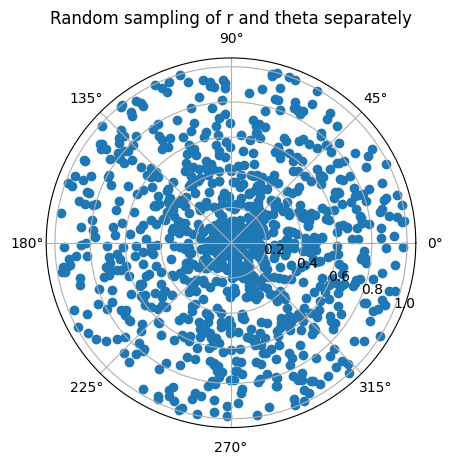

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import random

num_random_samples = 1000

r = [random.random() for _ in range(num_random_samples)]
theta = [random.random() * 2 * np.pi for _ in range(num_random_samples)]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(theta, r)
# Move radial labels away from plotted line for visibility
ax.set_rlabel_position(-22.5)

plt.title("Random sampling of r and theta separately")
plt.show()

Notice that, when r and $\theta$ are sampled independently, the points are concentrated in the center. This occurs because the amount of area described by $\delta r\delta\theta$ does not vary uniformly: it increases with increasing $r$. When $r$ is small, all the randomly chosen points are distributed over a small area; when $r$ is larger, the randomly-chosen points are spread out over a larger area.

For example, the area of the unit sphere described by the first $\frac{1}{3}$ of the radius, the region where $0 \le r \lt \frac{1}{3}$, is $A_{\frac{1}{3}} = \pi (\frac{1}{3})^2 = 0.349$.

The area described by the next $\frac{1}{3}$ of the radius, where $\frac{1}{3} \le r \lt \frac{2}{3}$, is  $A_{\frac{2}{3}} -  A_{\frac{1}{3}} = \pi(\frac{2}{3})^2 - \pi (\frac{1}{3})^2 = 1.047$.

The final third of the radius makes up 1.745 square units of area.

In other words, the innermost third of the radius accounts for $0.349 / 3.14159 = 0.111$, or 11.1%, of the total area of the unit sphere.

The second third of the radius accounts for $1.047 / 3.14159 = 0.333$, or 33.3%, of the total area of the unit sphere.

The outermost third of the radius accounts for $1.745 / 3.14159 = 0.555$, or 55.5%, of the total area of the unit sphere.

By randomly sampling the radius and the angle separately, we distribute the same number of points in each of these thirds, causing them to be concentrated in the small area nearest the center and distributing them over a comparatively wider area toward the outside of the circle.

In [27]:
def print_area_of_circle(radius):
    print(f"Area of circle with radius {radius} = {np.pi * radius * radius}")

def print_diff_in_area_of_circle(r1, r2):
    print(f"Difference in area between circle with radius {r2} and circle with radius {r1} = {np.pi * (r2*r2 - r1*r1)}")

print_area_of_circle(1/3)
print_area_of_circle(2/3)
print_area_of_circle(1)

print("\n")
print_diff_in_area_of_circle(1/3, 2/3)
print_diff_in_area_of_circle(2/3, 1)

Area of circle with radius 0.3333333333333333 = 0.34906585039886584
Area of circle with radius 0.6666666666666666 = 1.3962634015954634
Area of circle with radius 1 = 3.141592653589793


Difference in area between circle with radius 0.6666666666666666 and circle with radius 0.3333333333333333 = 1.0471975511965976
Difference in area between circle with radius 1 and circle with radius 0.6666666666666666 = 1.7453292519943295


# Unit Sphere
Points on a unit sphere ($r=1$) are defined by $\theta$, the angle in the xy plane from the positive x-axis, and $\phi$, the angle from the positive z-axis.

## Naive approach: Independently sampling each angle
As with the circle, randomly sampling over $\theta$ and $\phi$ independently does not give a uniform distribution of points over the unit sphere. Points are more concentrated at the poles and less concentrated around the equator.

In [33]:
def polar_to_cartesian(theta, phi):
    # theta is the angle in the xy plane from the positive x-axis
    # phi is the angle from the positive z-axis
    x = np.cos(theta) * np.sin(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(phi)
    return (x, y, z)

def plot_sphere(x, y, z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    
    # adjust the z-axis label position so it is visible
    ax.zaxis.labelpad = -0.1
    # correct the aspect ratio of the box so the sphere does not look flattened
    ax.set_box_aspect([np.ptp(x), np.ptp(y), np.ptp(z)])

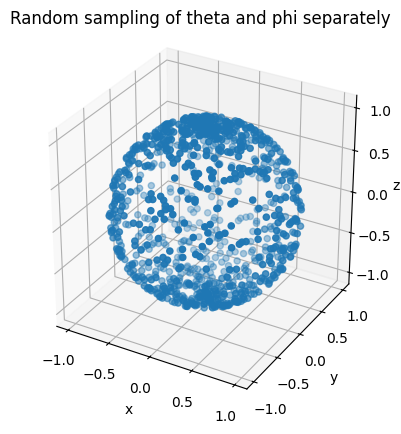

In [34]:
num_random_samples = 1000
theta = [random.random() * 2 * np.pi for _ in range(num_random_samples)]
phi = [random.random() * np.pi for _ in range(num_random_samples)]

x, y, z = polar_to_cartesian(theta, phi)
plot_sphere(x, y, z)
plt.title("Random sampling of theta and phi separately")
plt.show()

Similar to the case of the circle, this occurs because the amount of area described by $\delta\theta\delta\phi$ does not vary uniformly, but increases with increasing $\phi$.

## Achieving uniform sampling over the area

Because the area element is not uniform in $\phi$, instead of sampling from $\phi$ directly, we can sample from the inverse of the cumulative distribution function of $\phi$.

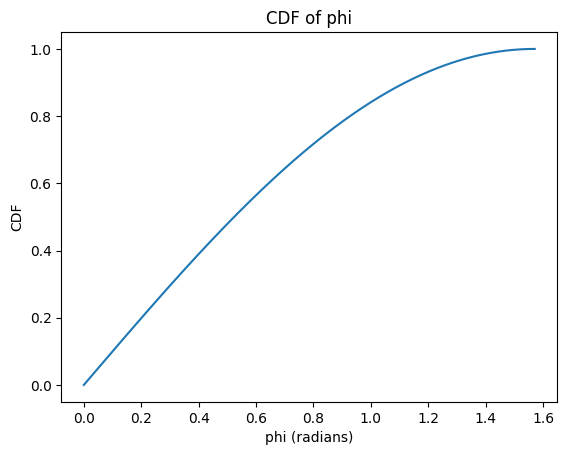

In [56]:
phi = np.linspace(0, np.pi / 2, 1000)
cdf = np.cos(np.pi / 2 - phi)

plt.plot(phi, cdf)
plt.title('CDF of phi')
plt.xlabel('phi (radians)')
plt.ylabel('CDF')
plt.show()

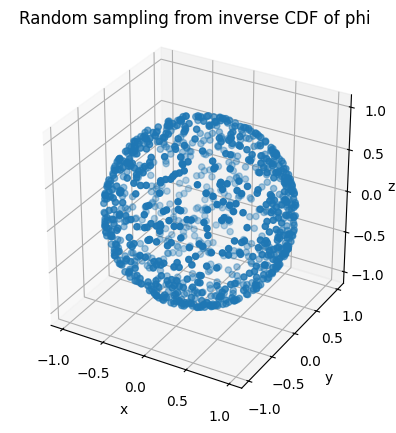

In [57]:
num_random_samples = 1000
theta = [random.random() * 2 * np.pi for _ in range(num_random_samples)]
phi_inverse_cdf = [np.acos(1 - 2 * random.random()) for _ in range(num_random_samples)]

x, y, z = polar_to_cartesian(theta, phi_inverse_cdf)
plot_sphere(x, y, z)
plt.title("Random sampling from inverse CDF of phi")
plt.show()